### Applied Machine Learning 1

##### Date: February 5 2020
##### Author: Jung Ah Shin 





### Visualizing Australia Fire dataset using Python

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [ ]:
df = pd.read_csv('fire_nrt_V1_96617.csv')

In [ ]:
df.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,bright_ti5,frp
count,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000,956257.000000
mean,-27.465569,142.191838,333.922148,0.460398,0.480464,986.334617,299.311259,15.557809
std,8.008223,10.986038,21.988456,0.089811,0.118792,555.548115,14.724600,45.584396
min,-43.212320,113.447010,208.000000,0.320000,0.360000,224.000000,150.000000,0.000000
25%,-33.133860,132.291060,312.800000,0.390000,0.380000,418.000000,289.500000,2.100000
50%,-30.489390,147.987880,336.700000,0.430000,0.440000,1400.000000,295.600000,5.200000
75%,-19.142220,150.751010,351.000000,0.510000,0.570000,1512.000000,307.600000,13.200000
max,-9.396500,153.452180,367.000000,0.800000,0.780000,1824.000000,380.000000,10717.200000


# Task 1: Density Plots
## 1.1 Plot the longitude vs latitude 

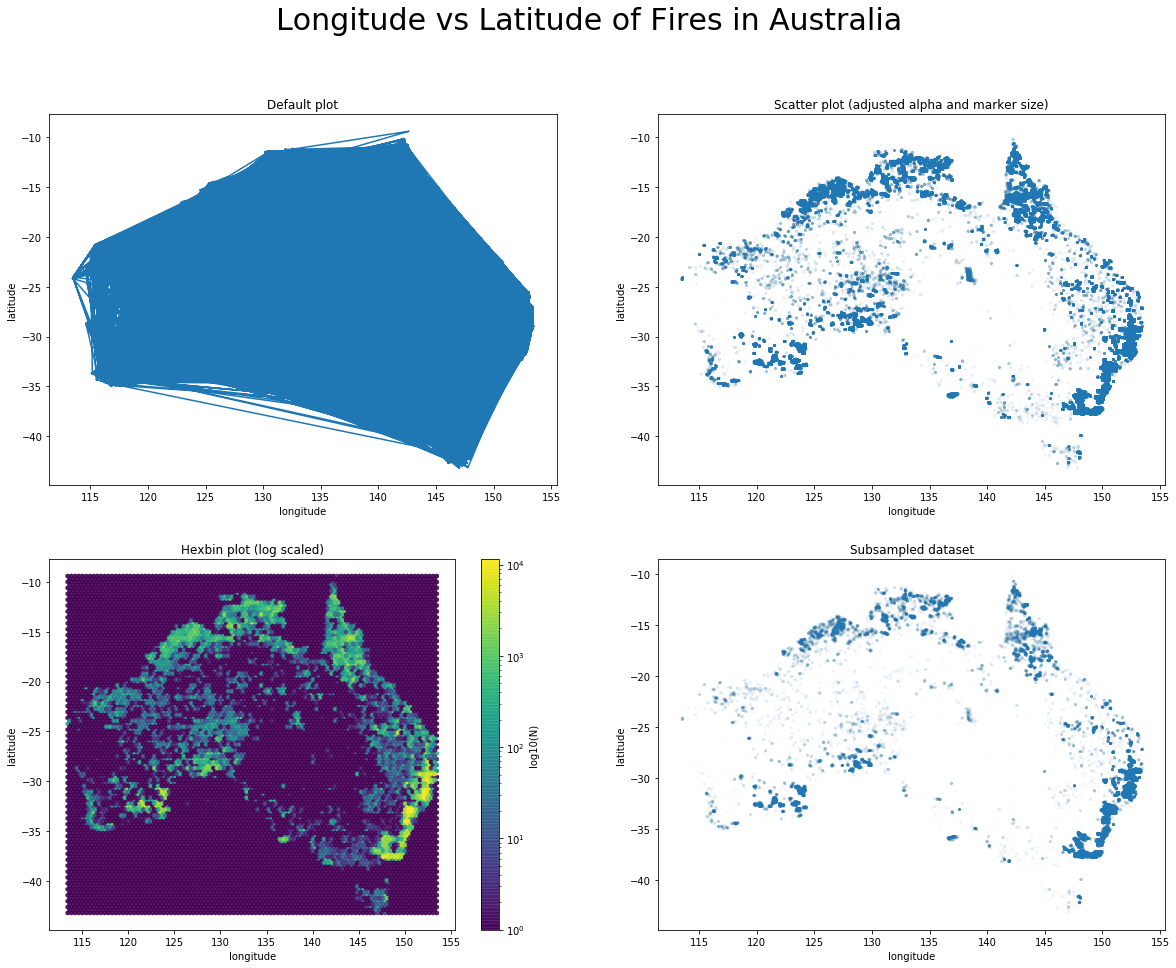

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,15))
fig.suptitle('Longitude vs Latitude of Fires in Australia', size = 30)

#1) Using the matplotlib defaults 
ax[0,0].plot(df.longitude, df.latitude) #latitude: y 
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].title.set_text('Default plot')
#2) Adjusting alpha and marker size
ax[0,1].scatter(df.longitude, df.latitude, alpha=0.01, s=5)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].title.set_text('Scatter plot (adjusted alpha and marker size)')
#3) Using a hexbin plot
b = ax[1,0].hexbin(df.longitude, df.latitude, bins='log', alpha=0.9)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
a = fig.colorbar(b, ax=ax[1,0])
a.set_label('log10(N)')
ax[1,0].title.set_text('Hexbin plot (log scaled)')
#4) Subsampling the dataset
df_sample = df.sample(frac=0.15, random_state=1)
ax[1,1].scatter(df_sample.longitude, df_sample.latitude, alpha=0.01, s=5)
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
ax[1,1].title.set_text('Subsampled dataset');


## 1.2 In what areas are most of the anomalies (measurements) located?

Based on the graphs, most of the anomalies (measurements) are located on the coastline, where the measurements are concentrated in New South Wales, North of Queensland, Northern Territory. We can also observe some anomalies in the northern part of Western Australia. These patterns can be easily observed in the scatter plot, hexbin plot, and the subsampled dataset as well. 

# Task 2: Visualizing class membership
## 2.1 Multiple plots

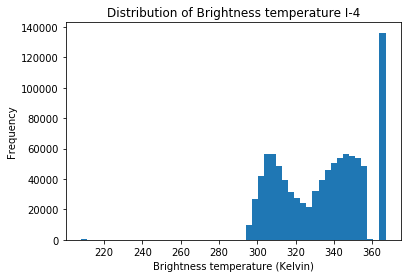

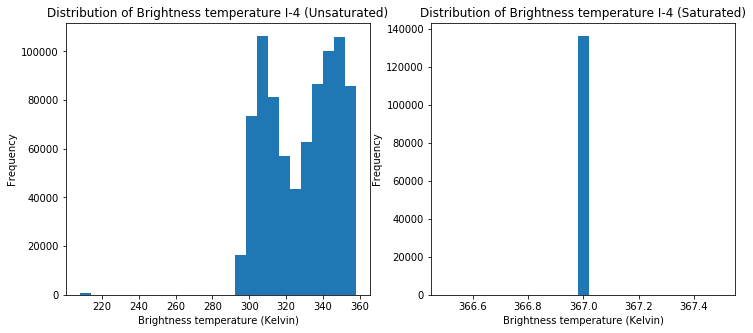

In [ ]:
plt.hist(df.bright_ti4, bins=50);
plt.title('Distribution of Brightness temperature I-4')
plt.xlabel('Brightness temperature (Kelvin)')
plt.ylabel('Frequency')
#df['bright_ti4'].describe() #367 is max 

saturated = df['bright_ti4'] >= 367
not_saturated = df['bright_ti4'] < 367
saturated_df = df[saturated]
not_saturated_df = df[not_saturated]

fig2, ax2 = plt.subplots(1,2, figsize=(12,5))
ax2[0].hist(not_saturated_df.bright_ti4, bins=25)
ax2[0].set_title('Distribution of Brightness temperature I-4 (Unsaturated)')
ax2[0].set_xlabel('Brightness temperature (Kelvin)')
ax2[0].set_ylabel('Frequency')

ax2[1].hist(saturated_df.bright_ti4, bins=25)
ax2[1].set_title('Distribution of Brightness temperature I-4 (Saturated)')
ax2[1].set_xlabel('Brightness temperature (Kelvin)')
ax2[1].set_ylabel('Frequency');

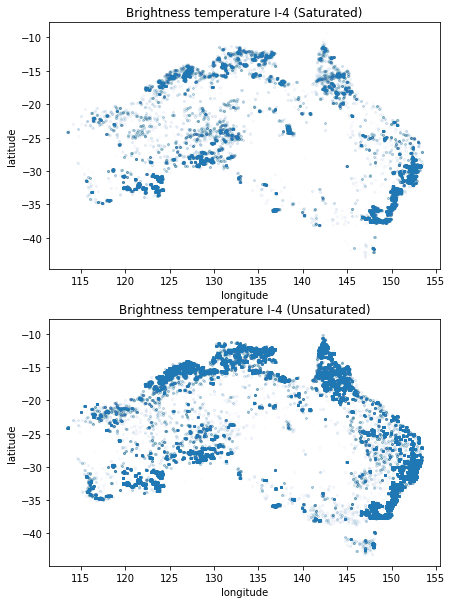

In [ ]:
fig1, ax1 = plt.subplots(2,1, figsize=(7,10))
c = ax1[0].scatter(saturated_df.longitude, saturated_df.latitude, alpha=0.01, s=5)

ax1[0].set_xlabel('longitude')
ax1[0].set_ylabel('latitude')
ax1[0].set_title('Brightness temperature I-4 (Saturated)')

e = ax1[1].scatter(not_saturated_df.longitude, not_saturated_df.latitude, alpha=0.01, s=5)

ax1[1].set_xlabel('longitude')
ax1[1].set_ylabel('latitude')
ax1[1].set_title('Brightness temperature I-4 (Unsaturated)');


The saturated group has much fewer data points compared to the unsaturated group. However, both groups have majority of the data points concentrated in the New South Wales region. In addition to New South Wales, we can also observe various concentration in measurements for the unsaturated group, such as the northern coastal regions of Australia.

## 2.2 Plot both groups in the same axes with different colors

### First version: Unsaturated plotted first, Saturated plotted second

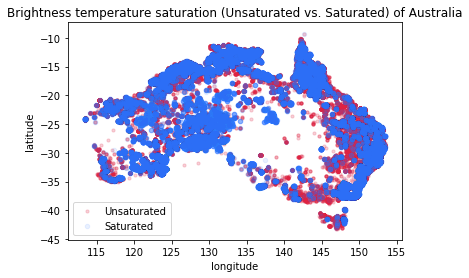

In [ ]:
p1 = plt.scatter(not_saturated_df.longitude, not_saturated_df.latitude, alpha=0.20, s=10, c='#DE2242')
p2 = plt.scatter(saturated_df.longitude, saturated_df.latitude, alpha=0.10, s=20, c='#2C77FF')

plt.legend((p1, p2), ('Unsaturated', 'Saturated'), loc='lower left')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Brightness temperature saturation (Unsaturated vs. Saturated) of Australia');

### Second version: Saturated plotted first, Unsaturated plotted second

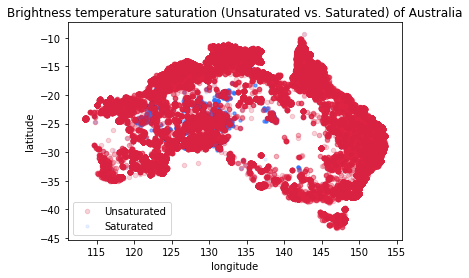

In [ ]:
p4 = plt.scatter(saturated_df.longitude, saturated_df.latitude, alpha=0.10, s=10, c='#2C77FF')
p3 = plt.scatter(not_saturated_df.longitude, not_saturated_df.latitude, alpha=0.20, s=20, c='#DE2242')

plt.legend((p3, p4), ('Unsaturated', 'Saturated'), loc='lower left')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Brightness temperature saturation (Unsaturated vs. Saturated) of Australia');

Since the unsaturated group has many more measurements compared to the saturated group, it is difficult to observe the saturated group when it is plotted first. Although the saturated group covers some data points, plotting the saturated group on top of the unsaturated group helps compare the two distributions better. However, since both of the plotting options cover data points, plotting both groups in the same axes may not be the best way to compare the distributions of both groups.

## 2.3 Better way to compare the two distributions

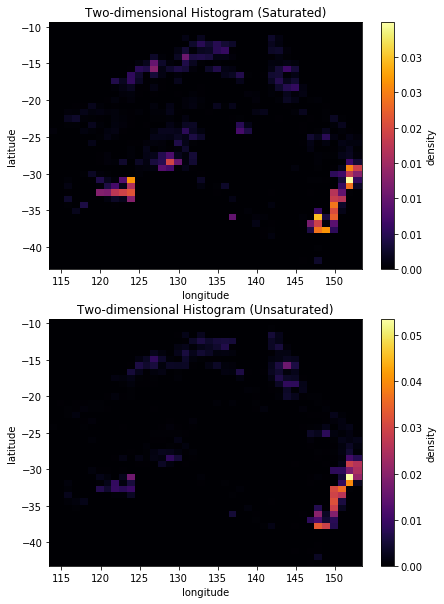

In [ ]:
#Normalized 2-dimensional histogram
fig3, ax3 = plt.subplots(2,1, figsize=(7,10))

g1 = ax3[0].hist2d(saturated_df.longitude, saturated_df.latitude, bins=40, cmap='inferno', density=True)
g2 = ax3[1].hist2d(not_saturated_df.longitude, not_saturated_df.latitude, bins=40, cmap='inferno', density=True)

c1 = fig3.colorbar(g1[3], ax=ax3[0], format='%.2f')
c2 = fig3.colorbar(g2[3], ax=ax3[1], format='%.2f')
c1.set_label('density')
c2.set_label('density')
ax3[0].title.set_text('Two-dimensional Histogram (Saturated)')
ax3[0].set_xlabel('longitude')
ax3[0].set_ylabel('latitude')

ax3[1].title.set_text('Two-dimensional Histogram (Unsaturated)')
ax3[1].set_xlabel('longitude')
ax3[1].set_ylabel('latitude');

Two-dimensional histogram is another way to compare the distribution of the measurements of brightness saturation. Although both individual scatter plots and overlapping plots were used to compare the brightness saturation groups (in Tasks 2.1 and 2.2), it was still difficult to compare the concentration of the anomalies given the varying frequency of data points. This was especially true for the saturated group.
Furthermore, based on the previous analysis, unsaturated group seemed to be much more concentrated than the saturated group in various regions. However, by using the two-dimensional histogram and normalizing their frequency, it made it easier to observe that saturated group's data is much more concentrated in both the New South Wales region and the southern part of Western Australia than the unsaturated group.  